In [78]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

import pyplot_themes as themes
themes.theme_solarized(scheme="dark")

In [79]:
X = pd.read_csv('totman1.csv')

In [80]:
X.columns

Index(['Unnamed: 0', 'host_id', 'host_response_rate',
       'host_total_listings_count', 'neighbourhood', 'neighbourhood_group',
       'zipcode', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'cleaning_fee', 'guests_included', 'number_of_reviews',
       'review_scores_rating', 'year', 'host_is_superhost_f',
       'host_is_superhost_t', 'host_identity_verified_f',
       'host_identity_verified_t', 'instant_bookable_f', 'instant_bookable_t',
       'total_price', 'log_tprice'],
      dtype='object')

In [81]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16174 entries, 0 to 16173
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 16174 non-null  int64  
 1   host_id                    16174 non-null  int64  
 2   host_response_rate         16174 non-null  float64
 3   host_total_listings_count  16174 non-null  float64
 4   neighbourhood              16174 non-null  object 
 5   neighbourhood_group        16174 non-null  object 
 6   zipcode                    16174 non-null  object 
 7   latitude                   16174 non-null  float64
 8   longitude                  16174 non-null  float64
 9   property_type              16174 non-null  object 
 10  room_type                  16174 non-null  object 
 11  accommodates               16174 non-null  int64  
 12  bathrooms                  16174 non-null  float64
 13  bedrooms                   16174 non-null  flo

In [82]:
X = X.iloc[:,[11,12,13,15,16,19]]

In [83]:
y = X.price

y -= y.mean()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=0)


In [84]:
print("Training MLPRegressor...")
tic = time()
est = make_pipeline(QuantileTransformer(),
                    MLPRegressor(hidden_layer_sizes=(50, 50),
                                 learning_rate_init=0.01,
                                 early_stopping=True))
est.fit(X_train, y_train)
print("done in {:.3f}s".format(time() - tic))
print("Test R2 score: {:.2f}".format(est.score(X_test, y_test)))

Training MLPRegressor...
done in 1.970s
Test R2 score: 0.81


Computing partial dependence plots...


ValueError: 'rocket' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

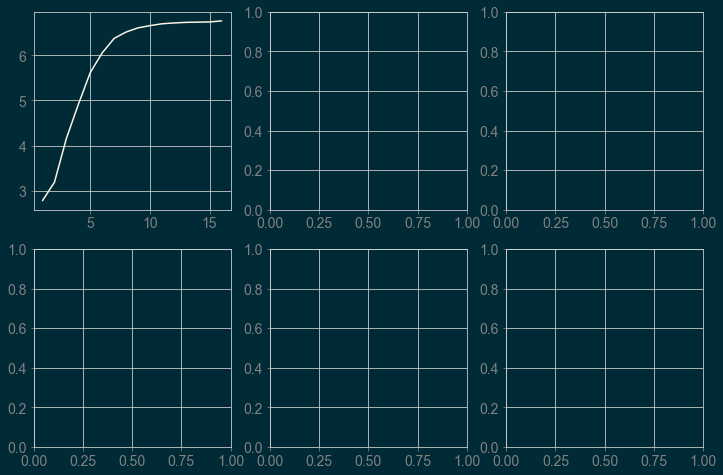

In [89]:
print('Computing partial dependence plots...')
tic = time()
# We don't compute the 2-way PDP (5, 1) here, because it is a lot slower
# with the brute method.
features = ['accommodates', 'bathrooms', 'bedrooms', 'price',
            'cleaning_fee',
       ('price', 'cleaning_fee')]
plot_partial_dependence(est, X_train, features,
                        n_jobs=3, grid_resolution=20)
print("done in {:.3f}s".format(time() - tic))
fig= plt.figure(figsize= (10,20))


fig.suptitle('Partial dependence Airbnb  features\n'
             'for NYC, with MLPRegressor')
fig.subplots_adjust(hspace = 5)


Training GradientBoostingRegressor...
done in 0.788s
Test R2 score: 0.95


Computing partial dependence plots...
done in 0.236s


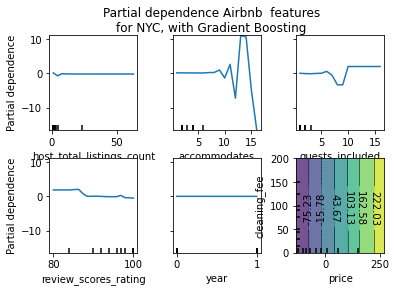

In [27]:
print('Computing partial dependence plots...')
tic = time()
features =  ['host_total_listings_count', 'accommodates',
       'guests_included', 'review_scores_rating', 'year',
       ('price', 'cleaning_fee')]
plot_partial_dependence(est, X_train, features,
                        n_jobs=3, grid_resolution=20)
print("done in {:.3f}s".format(time() - tic))
fig = plt.gcf()
fig.suptitle('Partial dependence Airbnb  features\n'
             'for NYC, with Gradient Boosting')
fig.subplots_adjust(wspace=0.4, hspace=0.3)

In [90]:
fig = plt.figure()

features = ('price', 'accommodates')
pdp, axes = partial_dependence(est, X_train, features=features,
                               grid_resolution=45)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=45, azim=210)
plt.colorbar(surf)
plt.suptitle('Partial dependence of Airbnb Prices on median\n'
             'price and accommodations')
plt.subplots_adjust(top=0.9)

plt.show()


ValueError: 'rocket' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

<Figure size 864x576 with 0 Axes>

In [45]:
df= pd.read_csv('June2020.csv')
df1 = pd.read_csv('June2019.csv')

In [47]:
df.info(), df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49530 entries, 0 to 49529
Columns: 105 entries, id to reviews_per_month
dtypes: float64(31), int64(19), object(55)
memory usage: 39.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48801 entries, 0 to 48800
Columns: 105 entries, id to reviews_per_month
dtypes: float64(28), int64(22), object(55)
memory usage: 39.1+ MB


(None, None)